$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 5 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [117]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

C:\Users\Dina\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [23]:
train.shape

(100000, 28)

In [24]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

there are null values in columns['Name',' Monthly_Inhand_Salary','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries'
                                 ,'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']   

In [26]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


we must do scaling between these features

In [27]:
train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

'Credit_Score' is imbalanced , we need to use parameter class_weight='balanced'

In [28]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

'Name' has 9985 null values ,but this column don't effect in output so we will drop it    
'Monthly_Inhand_Salary'  has 15002 null values , but 'Annual_Income' has the same information so we will drop it     
'Type_of_Loan'  has 11408 null values ,but this column don't effect in output so we will drop it    
'Num_of_Delayed_Payment' has 7002 null values  so, we will fill them by using 'mean'     
'Num_Credit_Inquiries' has 1965 null values  so, we will fill them by using 'mean'   
'Credit_History_Age' has 9030 null values  so, we will fill them by using 'mean'       
'Amount_invested_monthly' has 4479 null values  so, we will fill them by using 'mean'      
'Monthly_Balance' has 1200 null values  so, we will fill them by using 'mean'   

In [29]:
train.duplicated().sum()

0

In [30]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

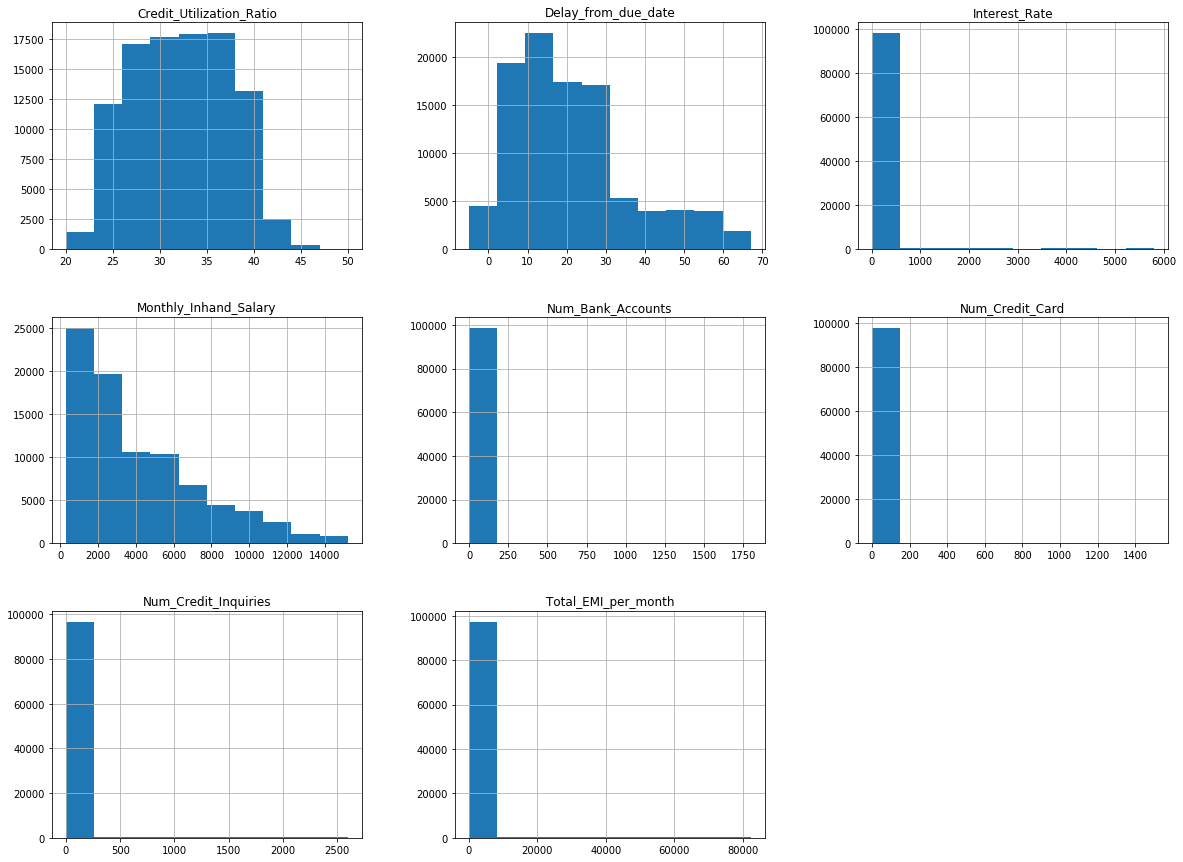

In [31]:
train.hist(figsize=(20,15));

'Credit_Utilization_Ratio' and 'Delay_from_due_date' have gaussian distribution  
'Monthly_Inhand_Salary' has right skewness distribution   
the rest of graph have small range between 0 to 500 almost 
so we need to do rescaling

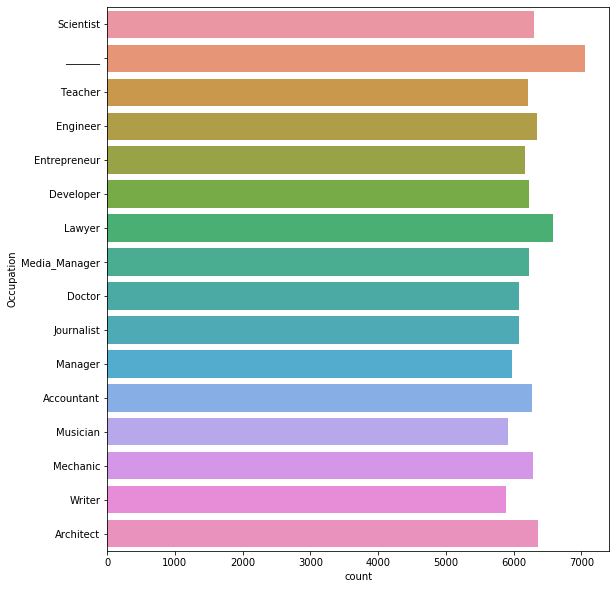

In [32]:
plt.figure(figsize=(9,10))
sns.countplot(y="Occupation",data=train);

There are approximately 7,000 classes that do not contain a Occupation  so we will drop them    
most customers are 'Lawyers' and 'Architect'

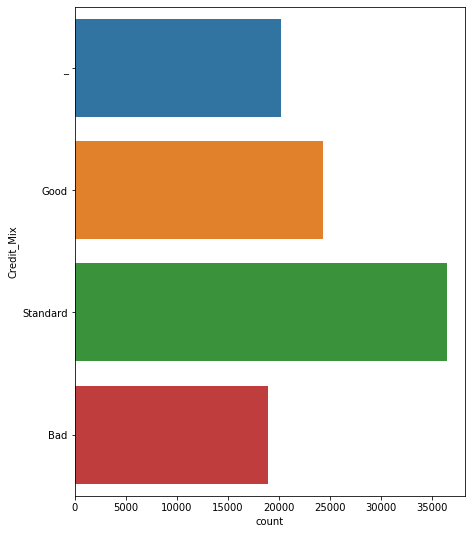

In [33]:
plt.figure(figsize=(7,9))
sns.countplot(y="Credit_Mix",data=train);

most Credit_Mix is Standard  
we need to drop '_' from this column 

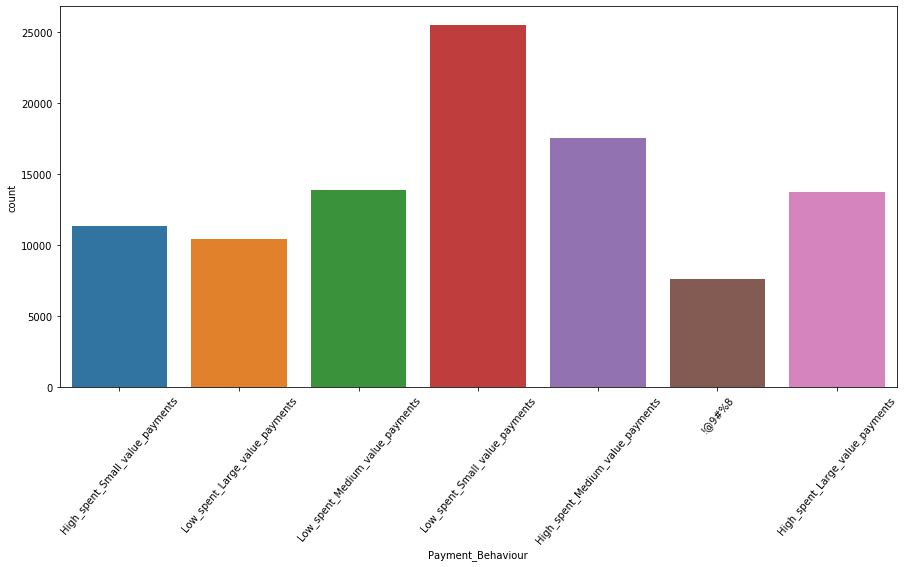

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=train)
plt.xticks(rotation=50);

most Payment_Behaviour is Low_spent_Small_value_payments    
we need to replace "!@9#%8"to NAN

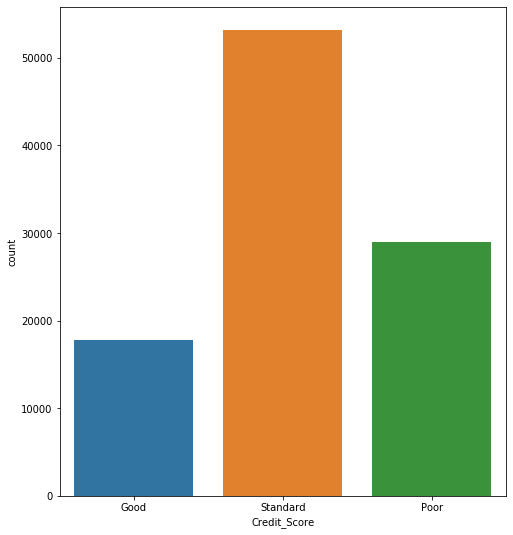

In [35]:
plt.figure(figsize=(8,9))
sns.countplot(x="Credit_Score",data=train);

most credit_score is Standard    
this column imbalance 

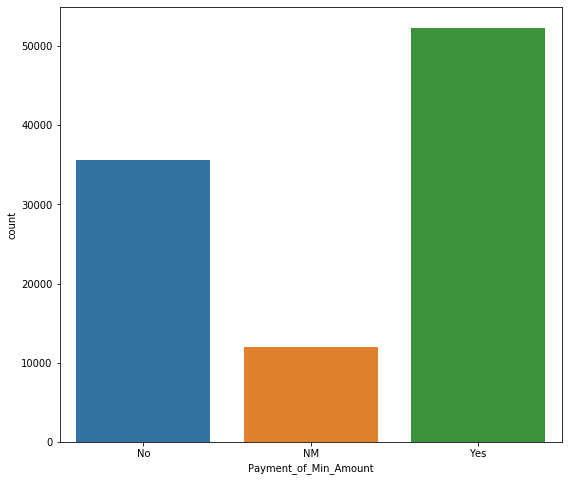

In [36]:
plt.figure(figsize=(9,8))
sns.countplot(x="Payment_of_Min_Amount",data=train);

most Payment_of_Min_Amount is Yes 

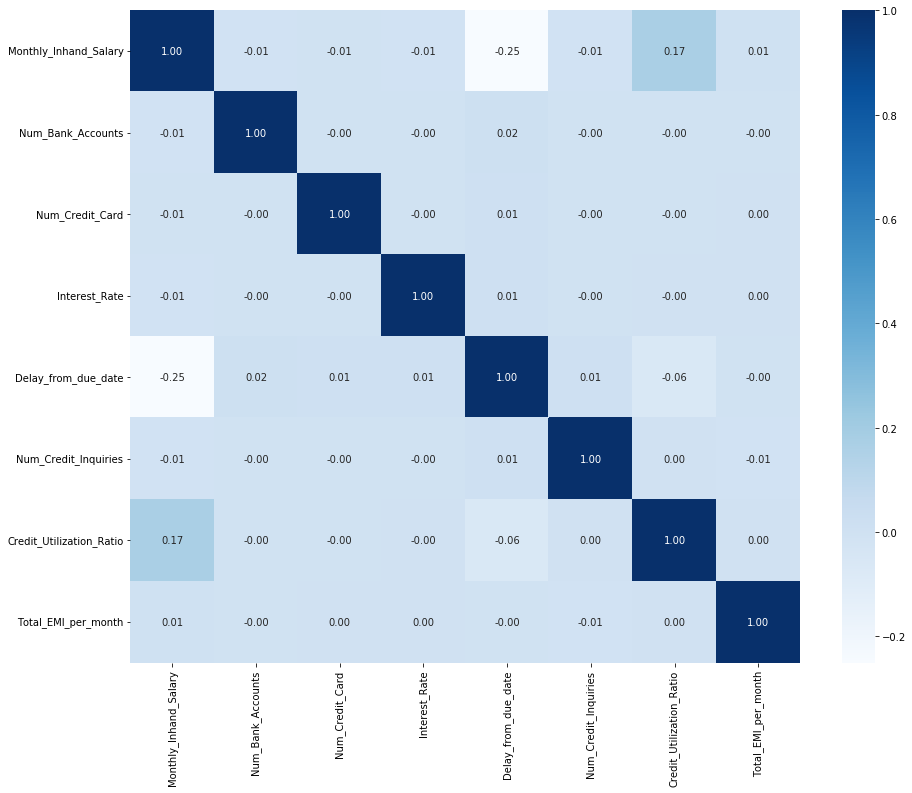

In [37]:
df_corr=train.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f");

there are no correlation between these features

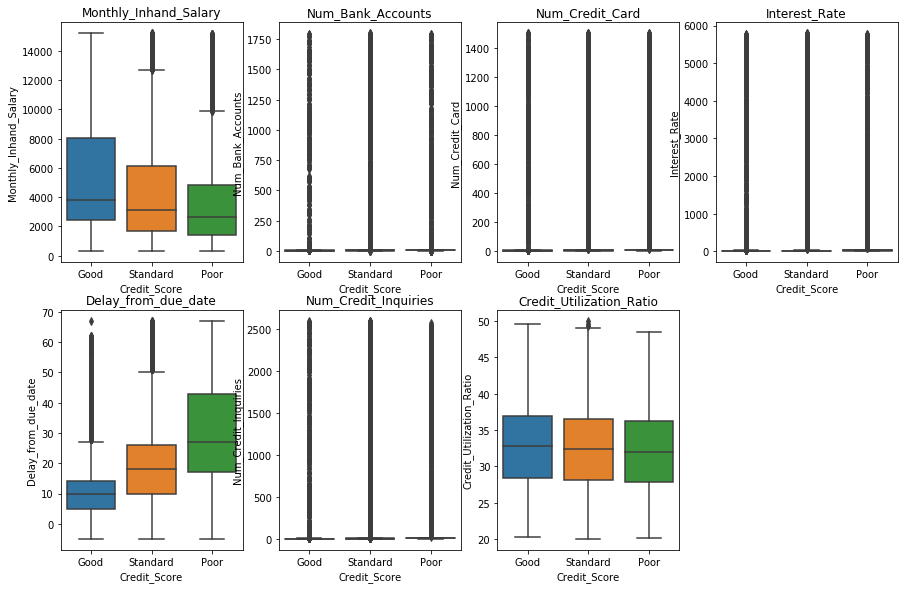

In [38]:
df_numeric=train.select_dtypes(include=["float64","int64"])
plt.figure(figsize=(15,15))
for ax, col in enumerate(df_numeric.columns[:-1]):
    plt.subplot(3,4, ax+1)
    plt.title(col)
    sns.boxplot(x="Credit_Score", y=col, data=train)

there are outliers

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

`Note:` You can take a sample from the training data to make the model training and fine-tuning faster.

Hints:
- It could be helpful to check `sklearn.preprocessing` module.

In [39]:
train.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Type_of_Loan","Month"], axis=1, inplace=True)

In [40]:
train['Credit_History_Age'] = train['Credit_History_Age'].str.extract(r'(\d+)')

In [41]:
train["Credit_History_Age"] = pd.to_numeric(train["Credit_History_Age"], errors="coerce")

In [42]:
train["Credit_History_Age"] = train["Credit_History_Age"].values.reshape(-1, 1)

In [43]:
numeric_imputer = SimpleImputer(strategy='mean')
train["Credit_History_Age"] = numeric_imputer.fit_transform(train[["Credit_History_Age"]])

In [44]:
train['Credit_History_Age']

0        22.000000
1        17.966516
2        22.000000
3        22.000000
4        22.000000
           ...    
99995    31.000000
99996    31.000000
99997    31.000000
99998    31.000000
99999    31.000000
Name: Credit_History_Age, Length: 100000, dtype: float64

In [45]:
train.drop(train[train["Occupation"]=='_______'].index,inplace=True)

In [46]:
label_encoder = LabelEncoder()
train['Occupation'] = label_encoder.fit_transform(train['Occupation'])

In [47]:
train.drop(train[train["Credit_Mix"]=='_'].index,inplace=True)

In [48]:
train["Credit_Mix"] = label_encoder.fit_transform(train["Credit_Mix"])

In [49]:
train.drop(train[train["Payment_Behaviour"]=="!@9#%8"].index,inplace=True)

In [50]:
train["Payment_Behaviour"] = label_encoder.fit_transform(train["Payment_Behaviour"])

In [51]:
train["Credit_Score"] = label_encoder.fit_transform(train["Credit_Score"])

In [52]:
train["Payment_of_Min_Amount"] = label_encoder.fit_transform(train["Payment_of_Min_Amount"])

In [53]:
train.dropna(subset=["Payment_Behaviour"], inplace=True)

In [54]:
train["Monthly_Balance"] = pd.to_numeric(train["Monthly_Balance"], errors="coerce")

In [55]:
train["Monthly_Balance"] = train["Monthly_Balance"].values.reshape(-1, 1)

In [56]:
train["Monthly_Balance"] = numeric_imputer.fit_transform(train[["Monthly_Balance"]])

In [57]:
train["Amount_invested_monthly"] = pd.to_numeric(train["Amount_invested_monthly"], errors="coerce")
train["Amount_invested_monthly"] = train["Amount_invested_monthly"].values.reshape(-1, 1)
train["Amount_invested_monthly"] = numeric_imputer.fit_transform(train[["Amount_invested_monthly"]])

In [58]:
train["Num_Credit_Inquiries"] = numeric_imputer.fit_transform(train[["Num_Credit_Inquiries"]])

In [59]:
train["Num_of_Delayed_Payment"] = pd.to_numeric(train["Num_of_Delayed_Payment"], errors="coerce")
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].values.reshape(-1, 1)
train["Num_of_Delayed_Payment"] = numeric_imputer.fit_transform(train[["Num_of_Delayed_Payment"]])

In [60]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_',np.nan)

In [61]:
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors="coerce")
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].values.reshape(-1, 1)
train['Changed_Credit_Limit'] = numeric_imputer.fit_transform(train[['Changed_Credit_Limit']])

In [62]:
train['Age']=train['Age'].replace('-500',np.nan)

In [63]:
train['Age'] = pd.to_numeric(train['Age'], errors="coerce")
train['Age'] = train['Age'].values.reshape(-1, 1)
train['Age'] = numeric_imputer.fit_transform(train[['Age']])

In [64]:
train["Annual_Income"] = pd.to_numeric(train["Annual_Income"], errors="coerce")
train["Annual_Income"] = train["Annual_Income"].values.reshape(-1, 1)
train["Annual_Income"] = numeric_imputer.fit_transform(train[["Annual_Income"]])

In [65]:
train["Num_of_Loan"] = pd.to_numeric(train["Num_of_Loan"], errors="coerce")
train["Num_of_Loan"] = train["Num_of_Loan"].values.reshape(-1, 1)
train["Num_of_Loan"] = numeric_imputer.fit_transform(train[["Num_of_Loan"]])

In [66]:
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [67]:
train['Delay_from_due_date'] = train['Delay_from_due_date'].abs()

In [68]:
columns_to_scale = ['Age', 'Annual_Income', 'Outstanding_Debt','Credit_Utilization_Ratio',
                    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
scaler = StandardScaler()
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [69]:
train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [70]:
X=train.drop("Credit_Score",axis=1)
y=train["Credit_Score"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1234)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [ ]:
test.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Type_of_Loan","Month"], axis=1, inplace=True)

In [ ]:
test['Credit_History_Age'] = test['Credit_History_Age'].str.extract(r'(\d+)')

In [ ]:
test["Credit_History_Age"] = pd.to_numeric(test["Credit_History_Age"], errors="coerce")

In [ ]:
test["Credit_History_Age"] = test["Credit_History_Age"].values.reshape(-1, 1)

In [ ]:
test["Credit_History_Age"] = numeric_imputer.transform(test[["Credit_History_Age"]])

In [ ]:
test.drop(test[test["Occupation"]=='_______'].index,inplace=True)

In [ ]:
test['Occupation'] = label_encoder.transform(test['Occupation'])

In [ ]:
test.drop(test[test["Credit_Mix"]=='_'].index,inplace=True)

In [ ]:
test["Credit_Mix"] = label_encoder.transform(test["Credit_Mix"])

In [ ]:
test.drop(test[test["Payment_Behaviour"]=="!@9#%8"].index,inplace=True)

In [ ]:
test["Payment_Behaviour"] = label_encoder.transform(test["Payment_Behaviour"])

In [ ]:
test["Payment_of_Min_Amount"] = label_encoder.transform(test["Payment_of_Min_Amount"])

In [ ]:
test.dropna(subset=["Payment_Behaviour"], inplace=True)

In [ ]:
test["Monthly_Balance"] = pd.to_numeric(test["Monthly_Balance"], errors="coerce")

In [ ]:
test["Monthly_Balance"] = test["Monthly_Balance"].values.reshape(-1, 1)

In [ ]:
test["Monthly_Balance"] = numeric_imputer.transform(test[["Monthly_Balance"]])

In [ ]:
test["Amount_invested_monthly"] = pd.to_numeric(test["Amount_invested_monthly"], errors="coerce")
test["Amount_invested_monthly"] = test["Amount_invested_monthly"].values.reshape(-1, 1)
test["Amount_invested_monthly"] = numeric_imputer.transform(test[["Amount_invested_monthly"]])

In [ ]:
test["Num_Credit_Inquiries"] = numeric_imputer.transform(test[["Num_Credit_Inquiries"]])

In [ ]:
test["Num_of_Delayed_Payment"] = pd.to_numeric(test["Num_of_Delayed_Payment"], errors="coerce")
test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].values.reshape(-1, 1)
test["Num_of_Delayed_Payment"] = numeric_imputer.transform(test[["Num_of_Delayed_Payment"]])

In [ ]:
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].replace('_',np.nan)

In [ ]:
test['Changed_Credit_Limit'] = pd.to_numeric(test['Changed_Credit_Limit'], errors="coerce")
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].values.reshape(-1, 1)
test['Changed_Credit_Limit'] = numeric_imputer.transform(test[['Changed_Credit_Limit']])

In [ ]:
test['Age']=test['Age'].replace('-500',np.nan)

In [ ]:
test['Age'] = pd.to_numeric(test['Age'], errors="coerce")
test['Age'] = test['Age'].values.reshape(-1, 1)
test['Age'] = numeric_imputer.transform(test[['Age']])

In [ ]:
test["Annual_Income"] = pd.to_numeric(test["Annual_Income"], errors="coerce")
test["Annual_Income"] = test["Annual_Income"].values.reshape(-1, 1)
test["Annual_Income"] = numeric_imputer.transform(test[["Annual_Income"]])

In [ ]:
test["Num_of_Loan"] = pd.to_numeric(test["Num_of_Loan"], errors="coerce")
test["Num_of_Loan"] = test["Num_of_Loan"].values.reshape(-1, 1)
test["Num_of_Loan"] = numeric_imputer.transform(test[["Num_of_Loan"]])

In [ ]:
test['Outstanding_Debt'] = pd.to_numeric(test['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [ ]:
test['Delay_from_due_date'] = test['Delay_from_due_date'].abs()

In [ ]:
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [92]:
model=DecisionTreeClassifier(random_state  =1234).fit(X_train,y_train)

In [93]:
model.tree_.max_depth,model.tree_.node_count,model.tree_.n_leaves

(41, 17965, 8983)

In [94]:
class_names=['Good','Standard','Poor']

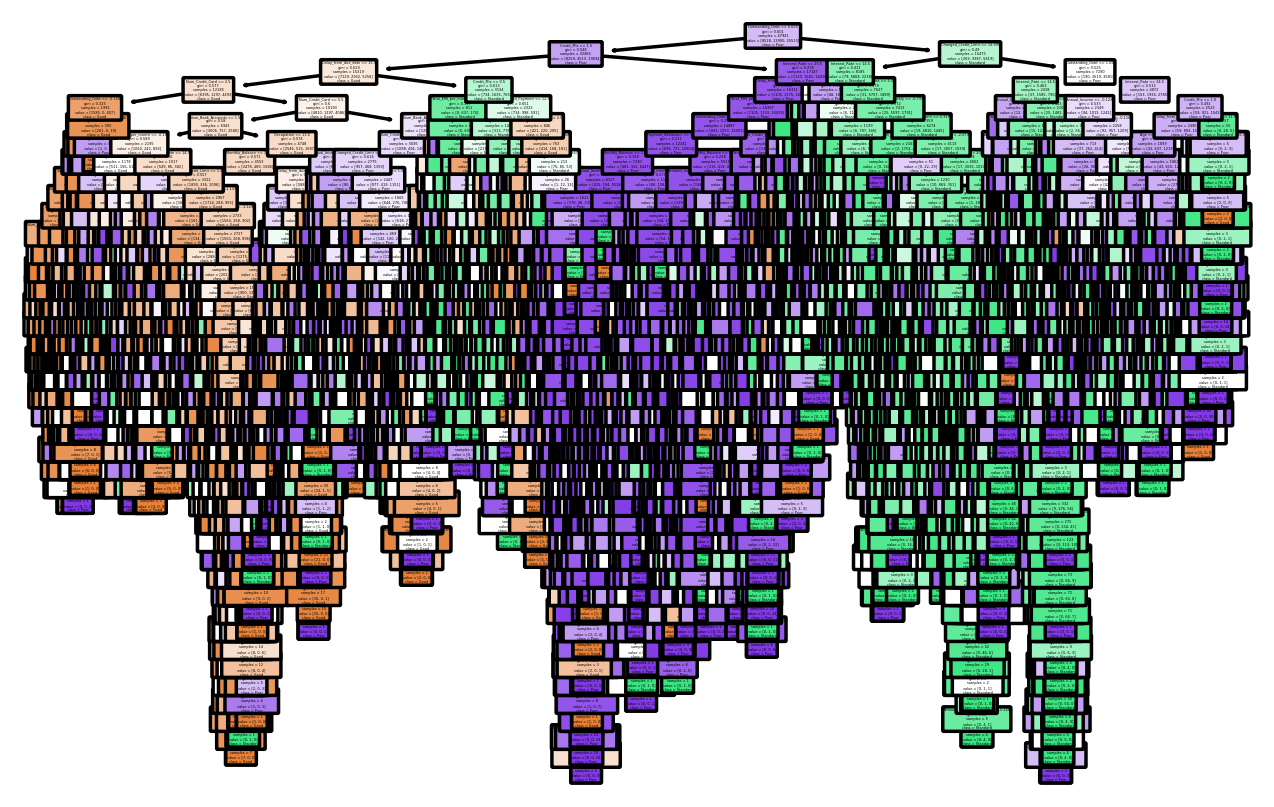

In [95]:
plt.figure(dpi=250)
plot_tree(model,feature_names=model.feature_names_in_,class_names=class_names,filled=True,rounded=True)
plt.show()

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

In [96]:
print(classification_report(y_train,model.predict(X_train),target_names=class_names,digits=4))

              precision    recall  f1-score   support

        Good     1.0000    1.0000    1.0000      8528
    Standard     1.0000    1.0000    1.0000     13900
        Poor     1.0000    1.0000    1.0000     25513

    accuracy                         1.0000     47941
   macro avg     1.0000    1.0000    1.0000     47941
weighted avg     1.0000    1.0000    1.0000     47941



Confusion Matrix:
[[ 8528     0     0]
 [    0 13900     0]
 [    0     0 25513]]


Text(51.0, 0.5, 'Actual')

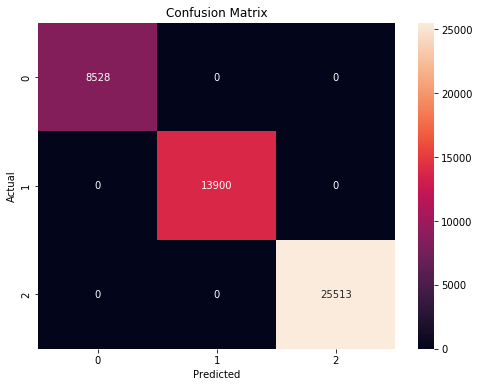

In [97]:
conf_matrix = confusion_matrix(y_train,model.predict(X_train))
print("Confusion Matrix:")
print(conf_matrix)
    
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

F1_score and confusion matrix are more reliable

 No,these values necessarily mean a good model,because it happened overfitting

## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

In [98]:
model1=DecisionTreeClassifier(max_depth=20,random_state  =1234).fit(X_train,y_train)

In [99]:
model1.tree_.max_depth,model1.tree_.node_count,model1.tree_.n_leaves

(20, 11891, 5946)

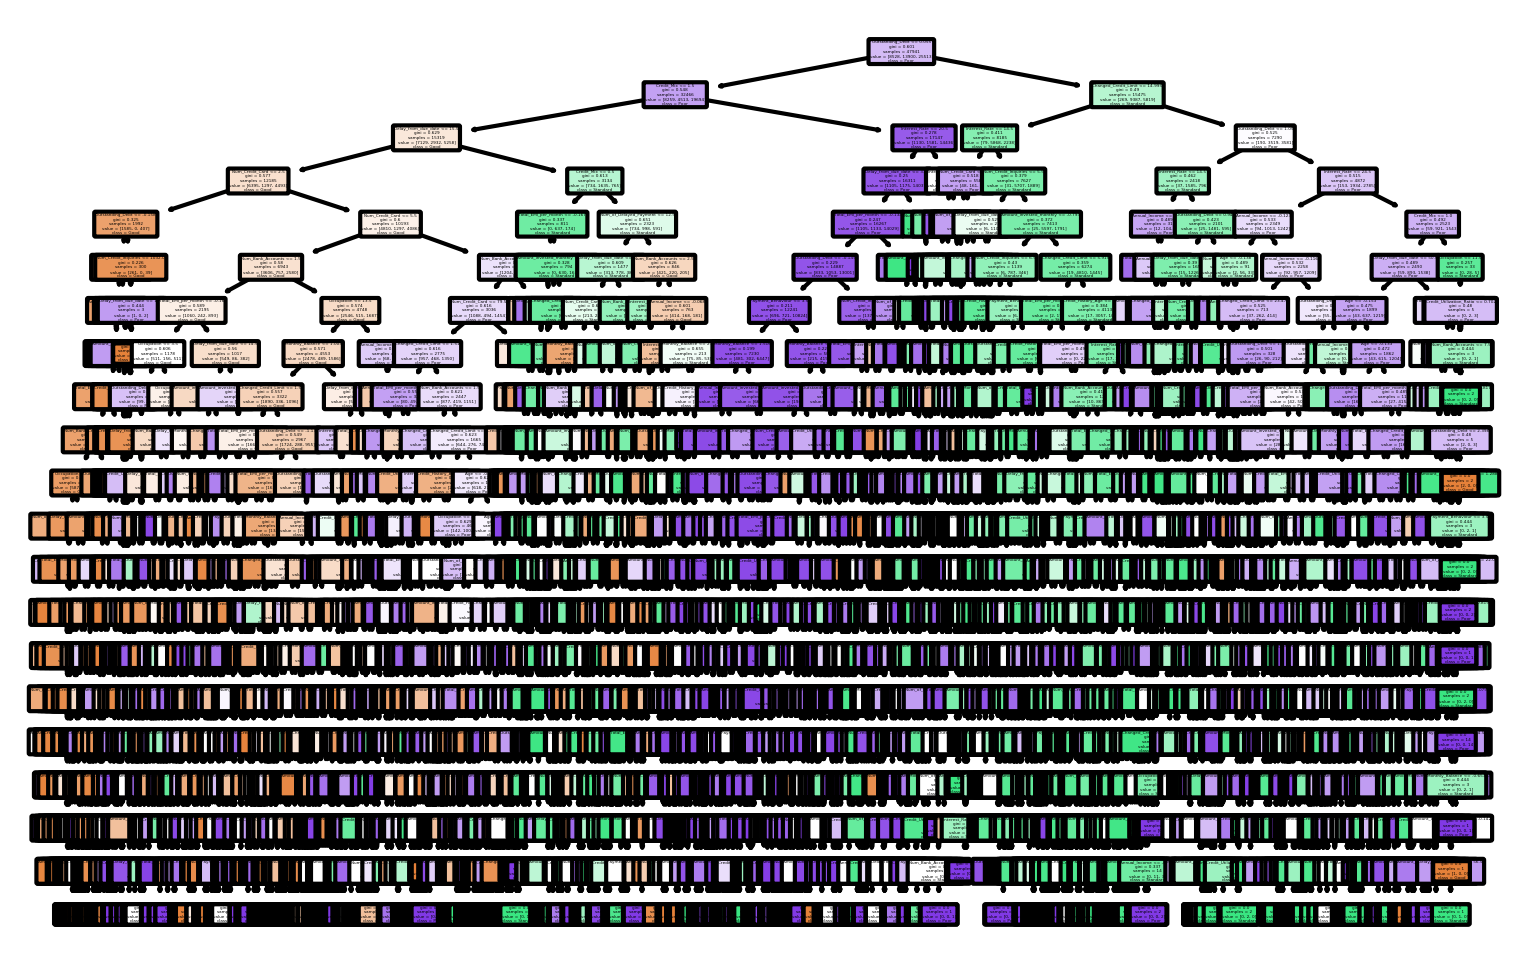

In [100]:
plt.figure(dpi=300)
plot_tree(model1,feature_names=model.feature_names_in_,class_names=class_names,filled=True,rounded=True)
plt.show()

In [102]:
print(classification_report(y_train,model1.predict(X_train),target_names=class_names,digits=4))

              precision    recall  f1-score   support

        Good     0.8859    0.9121    0.8988      8528
    Standard     0.9368    0.9357    0.9362     13900
        Poor     0.9444    0.9356    0.9400     25513

    accuracy                         0.9315     47941
   macro avg     0.9223    0.9278    0.9250     47941
weighted avg     0.9318    0.9315    0.9316     47941



Confusion Matrix:
[[ 7778    18   732]
 [  220 13006   674]
 [  782   860 23871]]


Text(51.0, 0.5, 'Actual')

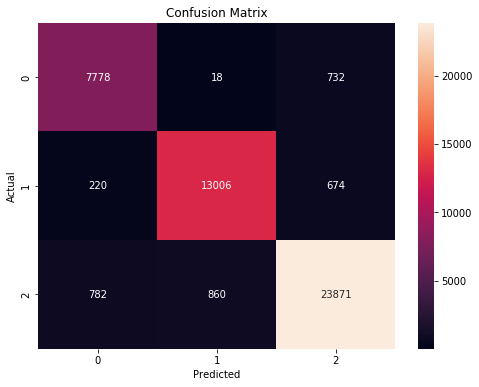

In [103]:
conf_matrix = confusion_matrix(y_train,model1.predict(X_train))
print("Confusion Matrix:")
print(conf_matrix)
    
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

yes, this simple regularization make the model generalize better,but it still exists overfitting

## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [144]:
param_dist = {
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [800, 1000,2000,3000,3500],
    'min_samples_leaf': [600,1000,2000,3000,4000],
    
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=1234)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [600, 1000, 2000,
                                                             3000, 4000],
                                        'min_samples_split': [800, 1000, 2000,
                                                              3000, 3500]},
                   random_state=1234)

In [145]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'min_samples_split': 1000, 'min_samples_leaf': 600, 'max_depth': 30}


In [146]:
best_dt_model = random_search.best_estimator_

In [147]:
print(classification_report(y_train,best_dt_model.predict(X_train),target_names=class_names,digits=4))

              precision    recall  f1-score   support

        Good     0.5675    0.6920    0.6236      8528
    Standard     0.6815    0.6654    0.6734     13900
        Poor     0.7593    0.7134    0.7357     25513

    accuracy                         0.6957     47941
   macro avg     0.6694    0.6903    0.6775     47941
weighted avg     0.7026    0.6957    0.6977     47941



Confusion Matrix:
[[ 5901   421  2206]
 [ 1087  9249  3564]
 [ 3410  3901 18202]]


Text(51.0, 0.5, 'Actual')

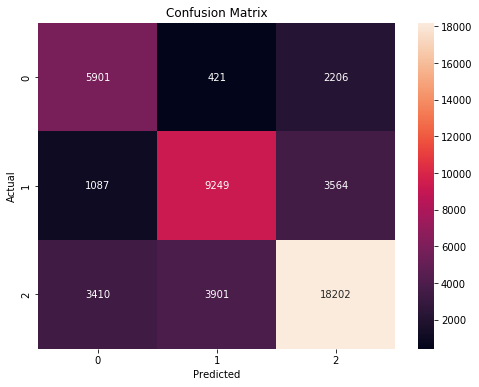

In [148]:
conf_matrix = confusion_matrix(y_train,best_dt_model.predict(X_train))
print("Confusion Matrix:")
print(conf_matrix)
    
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [149]:
param_grid = {
    'min_samples_split': [900,1000,2000],
    'min_samples_leaf': [550,600,700,1000,3000,4000],
    'max_depth': [25, 30, 35],
}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)

Best Hyperparameters from GridSearchCV: {'max_depth': 25, 'min_samples_leaf': 600, 'min_samples_split': 900}


In [150]:
best_dt_model_grid = grid_search.best_estimator_

In [151]:
print(classification_report(y_train,best_dt_model_grid.predict(X_train),target_names=class_names,digits=4))

              precision    recall  f1-score   support

        Good     0.5675    0.6920    0.6236      8528
    Standard     0.6815    0.6654    0.6734     13900
        Poor     0.7593    0.7134    0.7357     25513

    accuracy                         0.6957     47941
   macro avg     0.6694    0.6903    0.6775     47941
weighted avg     0.7026    0.6957    0.6977     47941



Confusion Matrix:
[[ 5901   421  2206]
 [ 1087  9249  3564]
 [ 3410  3901 18202]]


Text(51.0, 0.5, 'Actual')

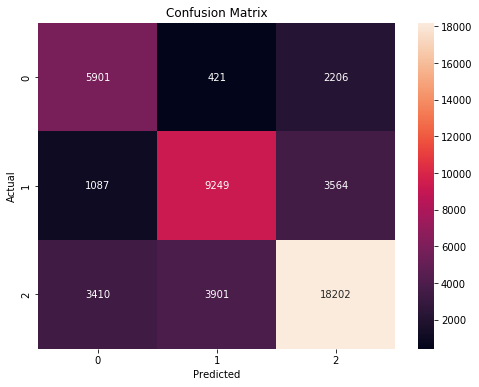

In [152]:
conf_matrix = confusion_matrix(y_train,best_dt_model_grid.predict(X_train))
print("Confusion Matrix:")
print(conf_matrix)
    
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?

`Q` Can you intrepet the importance of the few top features?

In [153]:
for f,i in zip(best_dt_model_grid.feature_names_in_,best_dt_model_grid.feature_importances_):
    print(f"{f} importance:{i}")

Age importance:0.0
Occupation importance:0.0010587305349939182
Annual_Income importance:0.001439999800892133
Num_Bank_Accounts importance:0.0031387829479721753
Num_Credit_Card importance:0.03672982084317801
Interest_Rate importance:0.04748261382902107
Num_of_Loan importance:0.0012310836598690951
Delay_from_due_date importance:0.07633354688063752
Num_of_Delayed_Payment importance:0.010897539713873297
Changed_Credit_Limit importance:0.043329386929002664
Num_Credit_Inquiries importance:0.00499326405309505
Credit_Mix importance:0.37079891211186927
Outstanding_Debt importance:0.3880151810318562
Credit_Utilization_Ratio importance:0.0003685657772101157
Credit_History_Age importance:0.0014257752368937893
Payment_of_Min_Amount importance:0.0
Total_EMI_per_month importance:0.006073698539591521
Amount_invested_monthly importance:0.0020052548926237854
Payment_Behaviour importance:0.0018736117731002974
Monthly_Balance importance:0.0028042314443201526


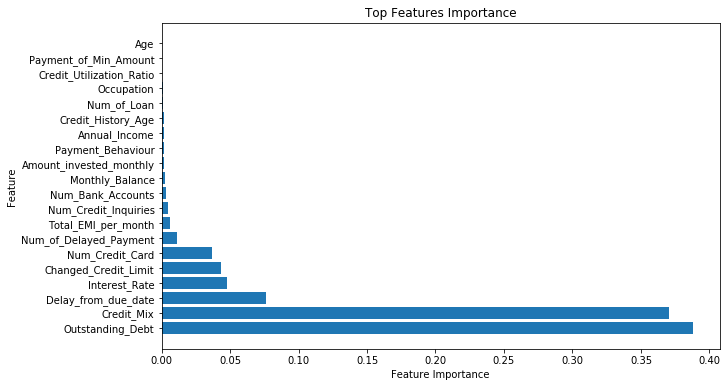

In [154]:
feature_importances = best_dt_model_grid.feature_importances_


feature_names = X.columns  


sorted_idx = feature_importances.argsort()[::-1]


plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_importances)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Importance')
plt.show()

yes, the importance values make sense

Outstanding_Debt expresses the customer's debts that have not yet been paid, 
and it is an important feature in determining whether the customer deserves to take another loan or not

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [155]:
y_pred_test = best_dt_model_grid.predict(X_test)

In [156]:
print(classification_report(y_test,y_pred_test,target_names=class_names,digits=4))

              precision    recall  f1-score   support

        Good     0.5550    0.6807    0.6115      3655
    Standard     0.6686    0.6633    0.6659      5957
        Poor     0.7525    0.6989    0.7247     10935

    accuracy                         0.6853     20547
   macro avg     0.6587    0.6809    0.6674     20547
weighted avg     0.6931    0.6853    0.6875     20547



Confusion Matrix:
[[2488  192  975]
 [ 468 3951 1538]
 [1527 1766 7642]]


Text(51.0, 0.5, 'Actual')

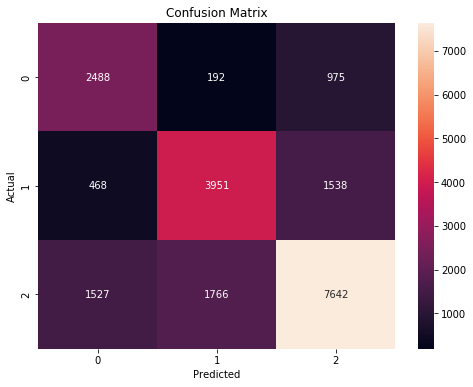

In [157]:
conf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)
    
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$